# Exploratory Analysis

Before we apply any machine learning algorithms, let's dive into the data and check that everything is ok.

In [1]:
import pandas as pd
import seaborn as sns
from datetime import datetime 

# import all the data

users = pd.read_csv('ml-100k/u.user', sep='|', names=['user_id', 'age', 'sex', 'occupation', 'zip_code'], encoding='latin-1')

ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=['user_id', 'movie_id', 'rating', 'unix_timestamp'], encoding='latin-1')

movies = pd.read_csv('ml-100k/u.item', sep='|', names=['movie id', 'movie title' ,'release date','video release date', 
                                                      'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation', 
                                                      'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
                                                      'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
                                                      'Thriller', 'War', 'Western'], 
                    encoding='latin-1')

In [2]:
users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


We should analyse this to have a look at the type of users that make up our dataset.

In [3]:
print("Average age: {:.0f}".format(users.age.mean()))
print("{0} Females and {1} Males".format(*users.groupby(['sex'])['age'].count()))
users.groupby(['occupation'])['age'].count()

Average age: 34
273 Females and 670 Males


occupation
administrator     79
artist            28
doctor             7
educator          95
engineer          67
entertainment     18
executive         32
healthcare        16
homemaker          7
lawyer            12
librarian         51
marketing         26
none               9
other            105
programmer        66
retired           14
salesman          12
scientist         31
student          196
technician        27
writer            45
Name: age, dtype: int64

It can be seen that the database is about 3/4 male which should be noted when considering the results. There is a good spread across occupations.

Let's have a look at our ratings.

In [4]:
ratings.describe()

,user_id,movie_id,rating,unix_timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


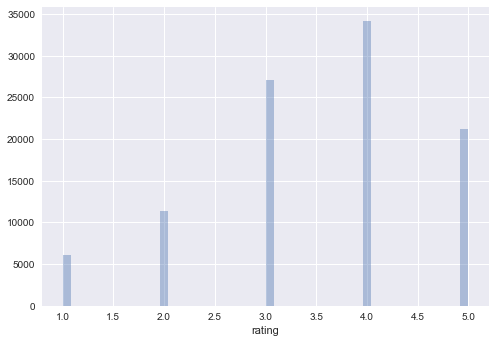

In [5]:
sns.distplot(ratings.rating, kde=False)
sns.plt.show()

Ratings from 1997-09-20 11:05:10 to 1998-04-23 07:10:38


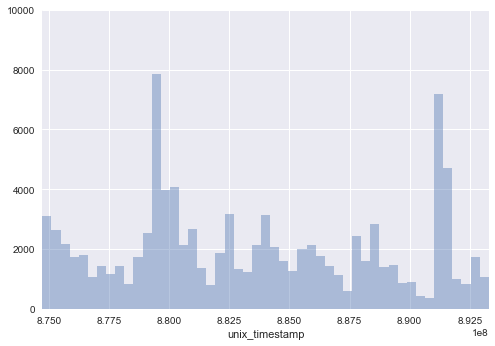

In [6]:
print("Ratings from {0} to {1}".format(datetime.fromtimestamp(ratings.unix_timestamp.min()),
                               datetime.fromtimestamp(ratings.unix_timestamp.max())))
ax = sns.distplot(ratings.unix_timestamp, kde=False)
ax.set_xlim([ratings.unix_timestamp.min(), ratings.unix_timestamp.max()])
ax.set_ylim([0,10000])
sns.plt.show()

We see the distribution is negatively skewed with the most common rating being 4 stars and every rating having a value. The data is fairly well distributed in time with their only being two major peaks.

Now let's look at the movies.

In [7]:
movies.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [22]:
movies.iloc[:,6:].sum(axis=0)

Action         251
Adventure      135
Animation       42
Children's     122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64